<a href="https://colab.research.google.com/github/VictorGlezDiez/07MBIG---Visualizacion-de-Datos/blob/main/Proyecto_Visualizacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://upload.wikimedia.org/wikipedia/commons/f/f8/Logo_VIU.png" width=200px>

**Máster en Big Data y Data Science - Visualización de datos**

**Víctor González Díez**

###**<font color=grey>Instalar librerías y cargar datos</font>**

#####**Instalar librerías**


In [1]:
import pandas as pd
import numpy as np
from google.colab import data_table

# Graficos
import matplotlib.pyplot as plt
import seaborn as sns

# Para cargar los datos
import io
from google.colab import files

#####**Cargar datos individualmente**

In [2]:
# Datos matematicas
uploaded = files.upload()
df_mat = pd.read_excel('student-mat.xlsx')
df_mat['asignatura'] = 'Matemáticas'

# Datos portugues
uploaded = files.upload()
df_por = pd.read_excel('student-por.xlsx')
df_por['asignatura'] = 'Portugués'

Saving student-mat.xlsx to student-mat.xlsx


Saving student-por.xlsx to student-por.xlsx


In [3]:
df_mat.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,asignatura
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6,Matemáticas
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6,Matemáticas
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10,Matemáticas
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15,Matemáticas
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10,Matemáticas


In [4]:
df_por.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,asignatura
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11,Portugués
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11,Portugués
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13,12,Portugués
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14,14,14,Portugués
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,11,13,13,Portugués


In [5]:
df_mat.describe().round(2).transpose()

,count,mean,std,min,25%,50%,75%,max
age,395.0,16.70,1.28,15.0,16.0,17.0,18.0,22.0
Medu,395.0,2.75,1.09,0.0,2.0,3.0,4.0,4.0
Fedu,395.0,2.52,1.09,0.0,2.0,2.0,3.0,4.0
traveltime,395.0,1.45,0.70,1.0,1.0,1.0,2.0,4.0
studytime,395.0,2.04,0.84,1.0,1.0,2.0,2.0,4.0
failures,395.0,0.33,0.74,0.0,0.0,0.0,0.0,3.0
famrel,395.0,3.94,0.90,1.0,4.0,4.0,5.0,5.0
freetime,395.0,3.24,1.00,1.0,3.0,3.0,4.0,5.0
goout,395.0,3.11,1.11,1.0,2.0,3.0,4.0,5.0
Dalc,395.0,1.48,0.89,1.0,1.0,1.0,2.0,5.0


In [6]:
df_por.describe().round(2).transpose()

,count,mean,std,min,25%,50%,75%,max
age,649.0,16.74,1.22,15.0,16.0,17.0,18.0,22.0
Medu,649.0,2.51,1.13,0.0,2.0,2.0,4.0,4.0
Fedu,649.0,2.31,1.10,0.0,1.0,2.0,3.0,4.0
traveltime,649.0,1.57,0.75,1.0,1.0,1.0,2.0,4.0
studytime,649.0,1.93,0.83,1.0,1.0,2.0,2.0,4.0
failures,649.0,0.22,0.59,0.0,0.0,0.0,0.0,3.0
famrel,649.0,3.93,0.96,1.0,4.0,4.0,5.0,5.0
freetime,649.0,3.18,1.05,1.0,3.0,3.0,4.0,5.0
goout,649.0,3.18,1.18,1.0,2.0,3.0,4.0,5.0
Dalc,649.0,1.50,0.92,1.0,1.0,1.0,2.0,5.0


#####**Juntar datos**

Se juntan los dos conjuntos de datos

In [7]:
df = df_mat.append(df_por, ignore_index=True)

Se prescinde de las notas obtenidas en el primer y segundo trimestre para centrarnos en la nota final.

In [8]:
df.drop(['G1', 'G2'], axis=1, inplace=True)

El conjunto de datos final que se va a utilizar es el siguiente.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 32 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      1044 non-null   object
 1   sex         1044 non-null   object
 2   age         1044 non-null   int64 
 3   address     1044 non-null   object
 4   famsize     1044 non-null   object
 5   Pstatus     1044 non-null   object
 6   Medu        1044 non-null   int64 
 7   Fedu        1044 non-null   int64 
 8   Mjob        1044 non-null   object
 9   Fjob        1044 non-null   object
 10  reason      1044 non-null   object
 11  guardian    1044 non-null   object
 12  traveltime  1044 non-null   int64 
 13  studytime   1044 non-null   int64 
 14  failures    1044 non-null   int64 
 15  schoolsup   1044 non-null   object
 16  famsup      1044 non-null   object
 17  paid        1044 non-null   object
 18  activities  1044 non-null   object
 19  nursery     1044 non-null   object
 20  higher  

#**<font color='FF6633'><u>¿Sacar malas notas significa falta de inteligencia?</u></font>**

###**<font color='FF6633'><u>1. Introducción</u></font>**

Muchas veces se vinculan los malos resultados de un alumno con un problema de falta de inteligencia a la hora de encarar las asignaturas. Sin embargo, hay muchas más variables que podrían estar influyendo en el rendimiento de los alumnos, como el entorno familiar en el que se desarrolla.

Hay numerosos ejemplos en la literatura en los que se intenta identificar los principales determinantes para un correcto desempeño en el colegio. En Cortez y Silva (2008), los autores elaboran un modelo que permite predecir el desempeño de un alumno en base a una serie de atributos. Sin embargo, en mi opinión, se centran solamente en los resultados del modelo sin prestar atención a la intepretación de los atributos utilizados y no incluyendo  material visual suficiente que ayude a entender las decisiones sobre la selección de variables llevada a cabo. Por ello, aprovechando los datos publicados por los autores, se decide aportar un análisis visual de los atributos contenidos en el conjunto de datos, con especial énfasis en los atributos vinculados a las condidiones socioeconómicas de los alumnos. 

Por lo tanto, el **OBJETIVO** del presente análisis es intentar entender más a fondo qué se esconde tras las notas obtenidas por los alumnos en la escuela, identificando posibles variables que influencien el rendimiento de los alumnos con independencia de sus características personales.

La **MOTIVACIÓN** de este documento reside en mi formación como economista con especialización en análisis económico enfocado a las áreas de probeza y desigualdad, siendo la educación un tema de gran interés como herramienta para luchar contra las desigualdades.

Dado que se pretende aportar más evidencias a la literatura académica, este informe esta destinado a un **PÚBLICO** con cierto nivel de conocimiento sobre estadística dada la complejidad de algunso de los gráficos y el análisis utilizado.

###**<font color='FF6633'><u>2. Contexto</u></font>**

Los datos proceden de Cortez y Silva (2008), y se encuentran publicados en UCI (Machine Learning Repository).

Estos datos incluyen las notas obtenidas durante el curso 2005/2006 por alumnos de dos colegios públicos de la región portuguesa de Alentejo, y una serie de características socioeconómicas de estos alumnos.

Los datos sobre las notas obtenidas y el número de ausencias provienen de los informes escolares, mientras que los datos socioeconómicos fueron recopilados mediante cuestionarios realizados a los mismos alumnos.

Para entender mejor la situación del país luso, es importante saber que en su caso la educación comienza con 3 años de educación preescolar, seguida de 9 años de educación básica, 3 de educación secundaria y, por último, la educación superior. La figura 1, proporcionada por Eurydice, ilustra de forma sencilla como se distribuye la educación en Portugal.






**Figura 1. La organización del sistema educativo portugués**

<img src="https://i1.wp.com/mundoafrente.com/wp-content/uploads/2017/08/sistema-educativo-portugu%C3%AAs2.jpg" width=750px>

<font color='white'>---------------------------------------------------------------------------------------------------------------------------------------------</font> <font color='grey'>Fuente: Eurydice.</font>






También es importante mencionar que el sistema de evaluación portugués califica a los alumnos en base a un sistema de 20 puntos, siendo 0 la puntuación más baja que se puede obtener. Además, los cursos se distribuyen a lo largo de tres trimestres, realizando una evaluación en cada uno de ellos.

Tal y como explican en el documento, en ese momento la tasa de abandono escolar en Portugal se encontraba muy por encima de la media europea, por lo que intentar entender el propio caso nacional era de gran utilidad a la hora de  tomar las decisiones necesarias en materia de política educativa.

El **gráfico 1** contiene la tasa de abandono escolar en Europa para el año 2018. Este gráfico se puede encontrar en su verisón dinámica en Tableau Public a través del siguiente enlace: https://public.tableau.com/views/Mapa_16369032005200/Mapa_tasa_abandono?:language=es-ES&publish=yes&:display_count=n&:origin=viz_share_link.

En él se puede observar que la situación de Portugal ha cambiado desde aquel momento, pasando a situarse actualmente por debajo de la media europea.


**Gráfico 1. Tasa de abandono escolar en Europa**

<a href="https://ibb.co/Cv2tJBL"><img src="https://i.ibb.co/Y8ZWD2g/Mapa-vf.png" alt="Mapa-vf" border="0" width=1000px></a>


###**<font color='FF6633'><u>3. Análisis</u></font>** 


El conjunto de datos se encuentra formado por los resultados obtenidos por un grupo de alumnos en dos materias: portugués y matemáticas; siendo más amplia la información relativa a la asignatura de portugués. En concreto, el 62% de la información se refiere a la asignatura de Portugués (**gráfico 2**).

Gráfico 2. Alumnos analizados por asignatura


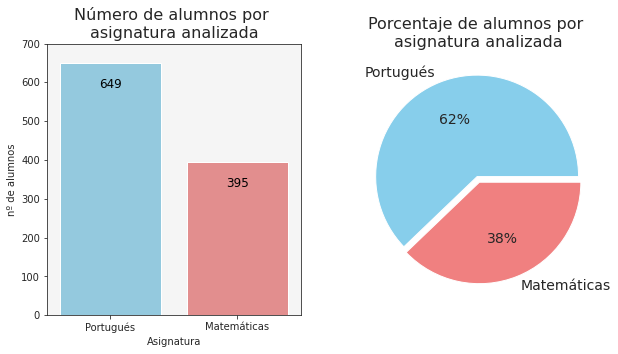

In [19]:
sns.set_style("ticks", {"axes.facecolor": "whitesmoke"})
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

###### Gráfico de barras
sns.countplot(x='asignatura', data=df, palette=["skyblue", "lightcoral"],
                   order = df['asignatura'].value_counts().index, ax = ax[0])
ax[0].set(xlabel='Asignatura', ylabel='nº de alumnos')
ax[0].set_title('Número de alumnos por \nasignatura analizada', size=16)
ax[0].set(ylim=(0, 700)) # Ajustar eje y

for p in ax[0].patches: # Para añadir etiquetas con el valor en las columnas
    ax[0].annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha='center', va='top', color='black', size=12)

for ax[0] in fig.axes: # Para rotar las etiquetas del eje x o alinearlas
    plt.sca(ax[0])
    plt.xticks(rotation=0, horizontalalignment ='center')

###### Gráfico de sectores
ax[1].pie(df.asignatura.value_counts(), labels = ['Portugués', 'Matemáticas'], colors = ['skyblue','lightcoral'], textprops={'fontsize': 14},
          explode=[0.03]*2, # Separar los sectores
          autopct='%.0f%%' #etiquetas de porcentajes
          )
ax[1].set_title('Porcentaje de alumnos por \nasignatura analizada', size=16)

###### Mostrar gráficos juntos
print("Gráfico 2. Alumnos analizados por asignatura")    
fig.show()

Dado que se analizan dos asignaturas diferentes, es de interés analizar la distribución de las notas que se obtienen en las dos asignaturas, pudiendo así concluir si cada asignatura tiene unas características propias por las que deba ser analizada de forma independiente. Para ello se usa un **histograma** en el **gráfico 3**. 

El gráfico de distribuciones permite concluir que las asignaturas tienen comportamientos parecidos en cuanto a clasificaciones, considerándose el conjunto total de la información en resto del informe.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Gráfico 3. Distribución de las notas por asignatura


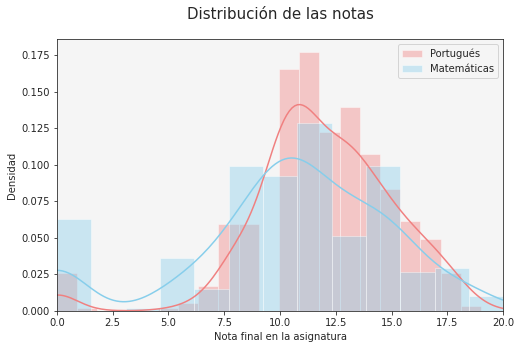

In [11]:
sns.set_style("ticks", {"axes.facecolor": "whitesmoke"})

# Distribución de las notas
plt.rcParams['figure.figsize']= [8,5]

ax = sns.distplot(df_por.G3.dropna(), color="lightcoral", label="Portugués")
ax = sns.distplot(df_mat.G3.dropna(), color="skyblue", label="Matemáticas")
ax.set(xlabel='Nota final en la asignatura', ylabel='Densidad') # Nombrar ejes
ax.set(xlim=(0, 20)) # Ajustar eje x

plot_title = 'Distribución de las notas'
title = plt.title(plot_title, pad=20, fontsize=15)

plt.legend()
print("Gráfico 3. Distribución de las notas por asignatura")    
plt.show()

Para conocer las relaciones entre todos los atributos disponibles se utiliza en el **gráfico 4** un mapa de calor, obviando la parte simétrica del mismo por conener la misma información que la representada finalmente. 

Gráfico 4. Matriz de correlación


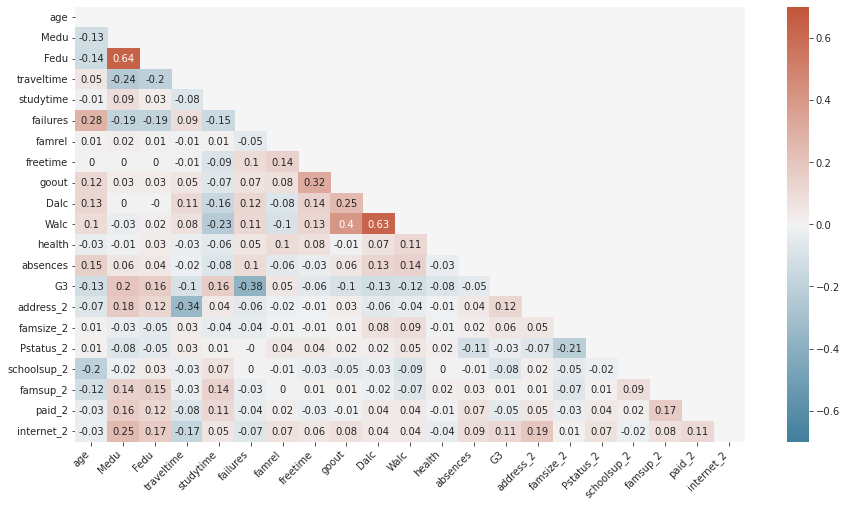

In [12]:
# Convertir atributos a categóricos:
df['address_2']=df['address'].astype('category').cat.codes
df['famsize_2']=df['famsize'].astype('category').cat.codes
df['Pstatus_2']=df['Pstatus'].astype('category').cat.codes
df['schoolsup_2']=df['schoolsup'].astype('category').cat.codes
df['famsup_2']=df['famsup'].astype('category').cat.codes
df['paid_2']=df['paid'].astype('category').cat.codes
df['internet_2']=df['internet'].astype('category').cat.codes

plt.rcParams['figure.figsize'] = [15, 8]
corrMatrix = df.corr()
mask = np.triu(np.ones_like(corrMatrix, dtype=bool)) # para cubrir la parte de arriba
corrMatrix = corrMatrix.round(2)
cmap = sns.diverging_palette(230, 20, as_cmap=True) # colores
sns.heatmap(corrMatrix, mask = mask, cmap = cmap, annot=True, vmin=-0.7, vmax=0.7)
plt.xticks(rotation=45, horizontalalignment='right')
print("Gráfico 4. Matriz de correlación")    
plt.show()

A simple vista destacan dos pares de atributos con una elación de 0,64 y 0,63 respectivamente.
* `Fedu` y `Medu`: se refieren a la educación del padre y de la madre en cada caso.
*`Walc` y `Dalc`: el primero se refiere al consumo de alcohol durante el fin de semana y el último al consumo de alcohol durante la semana laboral.

Para conocer mejor que se esconde destrás de estas correlaciones los **gráficos 5 y 6** usan un diagrama de dispersión al cual se le añade un tercer atributo usando el tamaño de las esferas para indicar el número de observaciones con esa combinación de atributos.

Gráfico 5. Correlación entre la educación de los padres


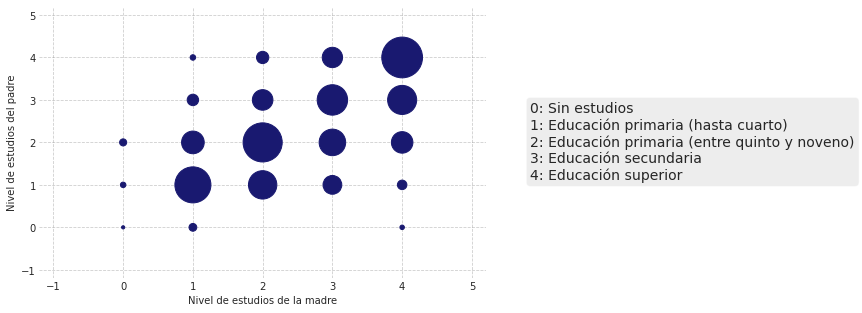

In [13]:
# Elegir variables
x = 'Medu'  
y = 'Fedu'  

# Compute the counts of observations
df_counts = df.groupby([x, y]).size().reset_index()
df_counts.columns.values[df_counts.columns == 0] = 'count'

# Compute a size variable for the markers so that they have a good size regardless
# of the total count and the number of unique values in each categorical variable
scale = 500*df_counts['count'].size
size = df_counts['count']/df_counts['count'].sum()*scale

# Create matplotlib scatter plot with additional formatting
fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y, size, data=df_counts, zorder=2, color="midnightblue")
ax.grid(color='grey', linestyle='--', alpha=0.4, zorder=1)
ax.tick_params(length=0)
ax.set_frame_on(False)
ax.margins(.3)
ax.set(xlabel='Nivel de estudios de la madre', ylabel='Nivel de estudios del padre') # Nombrar ejes

# place a text box in upper left in axes coords
textstr = "0: Sin estudios\n1: Educación primaria (hasta cuarto)\n2: Educación primaria (entre quinto y noveno)\n3: Educación secundaria\n4: Educación superior"
props = dict(boxstyle='round', facecolor='gainsboro', alpha=0.5) # Box design

ax.text(1.1, 0.65, textstr, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)

print("Gráfico 5. Correlación entre la educación de los padres")    

Gráfico 6. Correlación entre el cosumo de alcohol


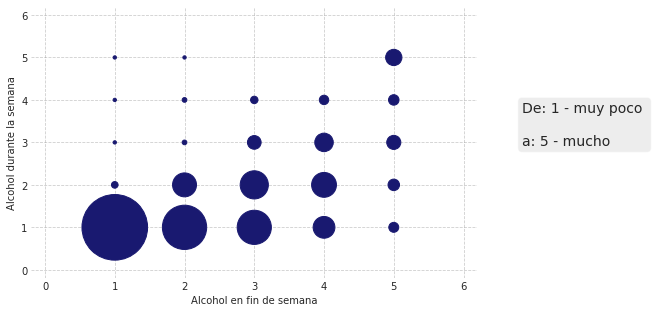

In [14]:
# Elegir variables
x = 'Walc'  
y = 'Dalc'  

# Compute the counts of observations
df_counts = df.groupby([x, y]).size().reset_index()
df_counts.columns.values[df_counts.columns == 0] = 'count'

# Compute a size variable for the markers so that they have a good size regardless
# of the total count and the number of unique values in each categorical variable
scale = 500*df_counts['count'].size
size = df_counts['count']/df_counts['count'].sum()*scale

# Create matplotlib scatter plot with additional formatting
fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y, size, data=df_counts, zorder=2, color="midnightblue")
ax.grid(color='grey', linestyle='--', alpha=0.4, zorder=1)
ax.tick_params(length=0)
ax.set_frame_on(False)
ax.margins(.3)
ax.set(xlabel='Alcohol en fin de semana', ylabel='Alcohol durante la semana') # Nombrar ejes

# place a text box in upper left in axes coords
textstr = "De: 1 - muy poco \n\na: 5 - mucho"
props = dict(boxstyle='round', facecolor='gainsboro', alpha=0.5) # Box design

ax.text(1.1, 0.65, textstr, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)

print("Gráfico 6. Correlación entre el cosumo de alcohol")    

En el caso de la educación de los padres, los datos indican que normalmente ambos padres tendrán el mismo nivel de estudios.

En el caso del consumo de alcohol se concluye que a medida que los alumnos consumen más alcohol durante el fin de semana también irán aumentando su consumo diario de alcohol durante los días de escuela.

Para estudiar la importancia de los atributos disponibles sobre la calificación final obtenida por el alumno se utiliza en el **gráfico 6** un gráfico de barras que ordena de forma jerárquica la correlación entre los atributos y la nota final obtenida. 

Gráfico 7. Correlación de las variables con la nota final


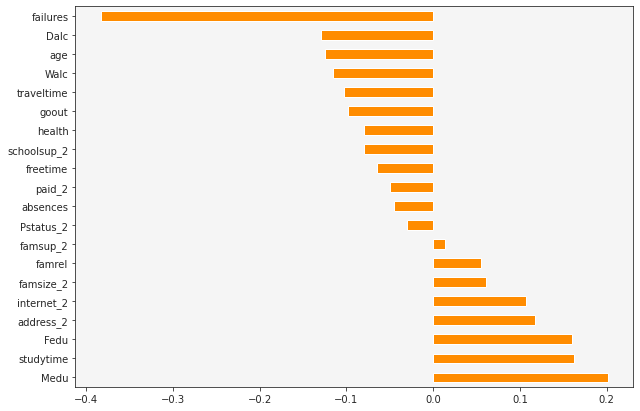

In [15]:
df_corr = df.corr()

plt.rcParams['figure.figsize'] = [10, 7]
(df_corr
     .G3
     .drop(['G3']) # No comparar con la misma variable
     .sort_values(ascending=False)
     .plot
     .barh(color='darkorange'))

print("Gráfico 7. Correlación de las variables con la nota final")    

Se observa que la principal correlación es con el número de suspensos anteriores. Como parece obvio, aquel estudiante que suele suspender, volverá a hacerlo en el futuro. Dada la obviedad de esta conclusión se decide sacar a este atributo del gráfico. Por el mismo motivo también se prescinde del atributo `studytime` que refleja las horas de estudio del alumno (a más horas, mejor rendimiento) y la edad del alumno por sucorrelación con el número de suspensos previos. De esta forma nos podremos centrar más a fondo en el resto de atributos seleccionados.

Para poder mejorar la compración entre las correlaciones se representa el valor absoluto de estas, lo que permite mediante el **gráfico 7** centrarse en los atributos con mayor correlación sin importar el signo de esta. De todas formas, para no perder la información relativa al signo de la correlaicón se incluye dicha dimensión mediante el uso del color en las barras, siendo estas de color verde cuando la correlacióne s positiva y roja en caso contrario.

Finalmente, se incluye una línea vertical de rayas para marcar la correlación igual a 0.1, permitiéndo poner el foco en aquellos atributos cuya correlación absoluta sea igual o superior a este umbral.


Gráfico 8. Correlación de las variables con la nota final


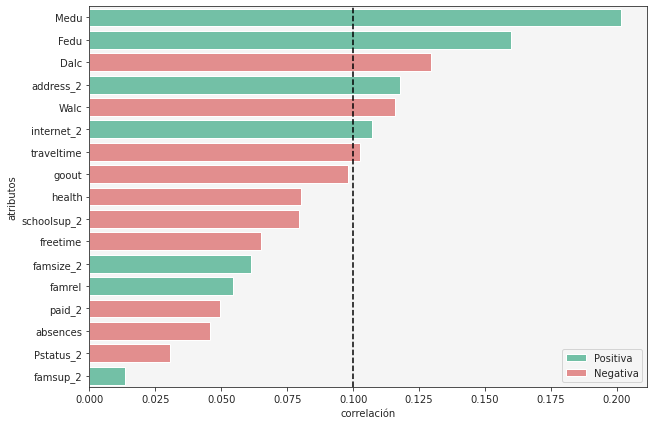

In [16]:
df_corr = df.corr()
df_corr['corr_pos_neg'] = ""
df_corr['corr_pos_neg'] = np.where(df_corr['G3']<0,
                                 "Negativa",
                                 "Positiva")

df_corr['G3'] = abs(df_corr['G3'])

df_corr_2 = df_corr.drop(df_corr.columns.difference(['G3','corr_pos_neg']), 1, inplace=False)
df_corr_2.drop(index=['G3', 'failures', 'studytime', 'age'], inplace=True)

df_corr_2['index'] = df_corr_2.index

ax = sns.barplot(x='G3', y='index', data=df_corr_2, hue="corr_pos_neg", dodge=False, palette=['mediumaquamarine', 'lightcoral'], order=df_corr_2.sort_values('G3',ascending = False).index)

#Drawing a horizontal line at point 1.25
ax.axvline(0.1, color="black", linestyle="--")

plt.legend()
ax.set(xlabel='correlación', ylabel='atributos')
print("Gráfico 8. Correlación de las variables con la nota final")    

Se puede concluir que hay ciertos atributos socioeconómicos de gran relevancia para el rendimiento académico de un alumno.

* **`Medu`** y **`Fedu`**: la educación de los padres (la cual está muy relacioanda como se vio anteriormente) resulta ser un factor muy relevante para el desarrollo educativo de los hijos. 
* **`Dalc`** y **`Walc`**: el consumo de alcohol reduce las horas de estudio del alumno y el aprovechamiento de estas, dando como resultaod un peor rendimiento escolar.
* **`address`**: si la persona vive en un entorno rural o urbano.
* **`internet`**: si la persona tiene acceso a internet en casa o no.

Una vez se han identificado estos atributos se pasa a analizar las diferencias que hay en las notas en base a ellos.

Para cumplir con este propósito el **gráifico 8** se utilizan un gráfico de cajas y bigotes.

En el caso de los estudios de la madre, y tal y como se observó anteriormente son muy pocos los casos en los que la madre no tiene estudios, por lo que ofrecería poca información en este tipo de gráfico y se elimina


In [17]:
df['internet'].unique()

array(['no', 'yes'], dtype=object)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

Gráfico 9. Impacto de los principales atributos socioeconómicos en los estudios del alumno


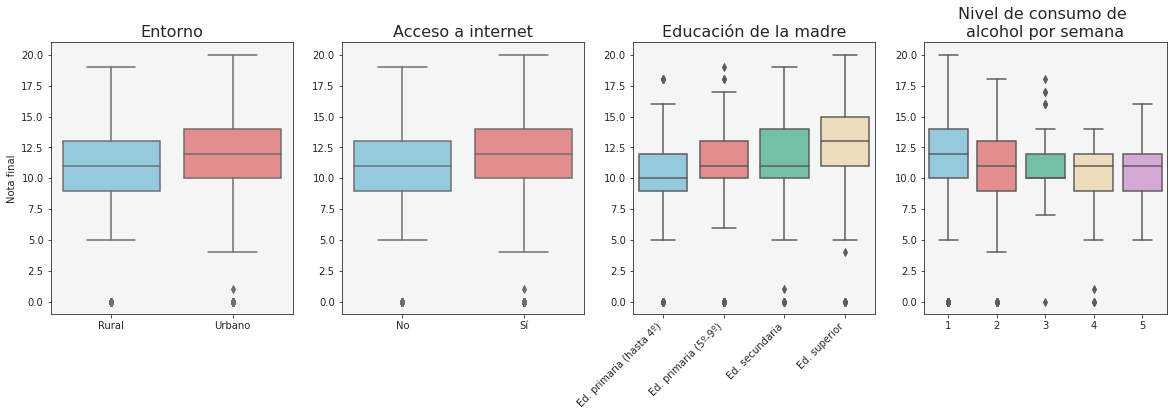

In [18]:
fig, ax = plt.subplots(1, 4, figsize=(20, 5))

# Crear paleta de colores
colors = ['skyblue','lightcoral','mediumaquamarine','wheat','plum']
sns.set_palette(sns.color_palette(colors))


###### BoxPlot de las notas por sexo y clase
df['address_3'] = np.where(df['address']=="U",
                                 "Urbano",
                                 "Rural")

with sns.axes_style(style='ticks'):
  sns.boxplot("address_3", "G3",
              data=df, ax = ax[0], order=["Rural", "Urbano"])
  
ax[0].set(xlabel='', ylabel='Nota final')
ax[0].set_title('Entorno', size=16)
  
###### BoxPlot de las notas por sexo y clase
df['internet_3'] = np.where(df['internet']=="no",
                                 "No",
                                 "Sí")

with sns.axes_style(style='ticks'):
  sns.boxplot("internet_3", "G3",
              data=df, ax = ax[1])
  
ax[1].set(xlabel='', ylabel='')
ax[1].set_title('Acceso a internet', size=16)

###### BoxPlot de las notas por sexo y clase
df['Medu_3'] = np.where(df['Medu']==0,
                        "Sin estudios",
                        np.where(df['Medu']==1,
                                 "Ed. primaria (hasta 4º)",
                                 np.where(df['Medu']==2,
                                           "Ed. primaria (5º-9º)",
                                          np.where(df['Medu']==3,
                                                   "Ed. secundaria",
                                                   "Ed. superior"))))

df_2 = df.drop(df[df.Medu == 0].index, inplace=False)

with sns.axes_style(style='ticks'):
  sns.boxplot("Medu_3", "G3",
              data=df_2, order=["Ed. primaria (hasta 4º)", "Ed. primaria (5º-9º)", "Ed. secundaria", "Ed. superior"], ax = ax[2])
  
ax[2].set(xlabel='', ylabel='')
ax[2].set_title('Educación de la madre', size=16)
ax[2].set_xticklabels(ax[2].get_xticklabels(), rotation=45, horizontalalignment='right')


###### BoxPlot de las notas por sexo y clase
with sns.axes_style(style='ticks'):
  sns.boxplot("Dalc", "G3",
              data=df, ax = ax[3])
  
ax[3].set(xlabel='', ylabel='')
ax[3].set_title('Nivel de consumo de \nalcohol por semana', size=16)

###### Mostrar gráficos juntos
print("Gráfico 9. Impacto de los principales atributos socioeconómicos en los estudios del alumno")    
fig.show()

###**<font color='FF6633'><u>4. Conclusión</u></font>**

Tal y como se ha podido observar en los gráficos anteriores, existen ciertos atributos socioeconómicos que afectan al rendimiento académico de los alumnos.

Gozar de un entorno apropiado para el desarrollo educativo de la juventud es esencial. Las personas que viven en entornos rurales tienen que afrontar un mayor tiempo de desplazamiento hasta la escuela, tal y como indica la correlación observada entre estos dos atributos.  Esto finalmente se traduce en una diferencia significativa en las notas entre aquellos alumnos que provienen de hogares en zonas rurales y los que viven en una zona urbana.

Disponer de conexión a internet amplía notablemente la sposibilidades del alumno a la hora de estudiar y hacer las tareas diarias. EN el gráfico de cajas se observa que los alumnos que tienen acceso a internet en casa obtienen de media resultados superiores que los que no tienen acceso.

Por otra parte, poder recibir ayuda por parte de los apdres también tiene un efecto positivo en el redimiento académica, mostrando una mejora de las calificaciones a medida que auemnta el nivel educativo de los padres.

Finalmente, un mayor control parental de cara a salir de fiesta y el consumo de alcohol favorecerá el desarrollo educativo del alumno.

**Por lo tanto**, los resultados académicas no muestran necesariamente el nivel de inteligencia de la persona, puesto dependen en un gran número de atributos.

# **Explicación de los gráficos**

###**Gráfico 1** 🌍 / 📊 <font color=grey>Mapa y gráfico de barras</font>

En el gráfico 1 se pueden identificar dos tipos de gráficos diferentes para representar el mismo atributo, la tasa de abandono escolar. 
1. **Mapa coroplético**.
2. **Gráfico de barras**. 

En ambos casos se usa una escala de colores de cinco escalones que va de verde oscuro 🟩 a rojo oscuro 🟥 pasando por el amarillo 🟨, puesto que son colores usados tradicionalmente para indicar diferenciar si una situación es favorable, mejorable o preocupante.

El **mapa** permite ofrecer una ilustración sencilla para identificar posibles relaciones entre la tasa de abandono y la posición geográfica de los países. Por otra parte, el **gráfico de barras** muestra en forma de ranking la situación de cada país ordenada de mejor a peor, facilitando la comparación entre países (principal ventaja de los gráficos de columnas o barras).

En la versión dinámica del gráfico se puede filtrar por año para ver como va cambiando la situación y también se puede filtrar por país en cada gráfico seleccionando aquellos que sean de interés.

###**Gráfico 2** 📊 / ⚪ <font color=grey>Gráfico de columnas  y gráfico de sectores </font>

En el gráfico 2 se usan nuevamente dos tipos de gráficos diferentes. 
1. **Gráfico de columnas**: permite comprar la cantidad de alumnos con dato para cada una de las aisgnaturas analizadas en el estudio.
2.  **Gráfico de sectores**: permite comparar el porcentaje de alumnos en cada asignatura analizada. También se podría haber optado por un gráfico de barras apiladas, pero estéticamente sería un poco limitado al solo contar con una única columna.

###**Gráfico 3** 📈📊 <font color=grey>Histograma</font>

El gráfico 3 se trata de un histograma, al que se le ha añadido la evolución lineal de la distribución. Este tipo de gráfico es el más adecuaod cuando se quiere representar la distribución de un conjunto de datos. En este caso se ha representado la nota final de los alumnos por asignatura.

###**Gráfico 4** 🚦 <font color=grey>Mapa de calor</font> 

En el gráfico 4 se utiliza un mapa de calor  para representar las correlaciones entre todos los atributos numéricos o categóricos del conjunto de datos. Este gráfico permite identificar fácilmente tanto las variables que muestran correlaciones más elevadas, como el signo de la correlación. 

###**Gráficos 5 y 6** ⚫⚫ <font color=grey>Diagrama de puntos</font>

En los gráficos 5 y 6 se utiliza un diagrama de puntos (*scatterplot*) puesto que es un gráfico muy indicado para representar la relación entre dos atributos. Además, se le añade una tercera dimensión mediante el tamaño de las esferas para indicar el número de veces que se da esa combinación de valores entre los dos atributos.

###**Gráficos 7 y 8**  📊 <font color=grey>Gráfico de barras</font>

En los gráficos 7 y 8 se utiliza el gráfico de barras para poder comprar las correlaciones de los atributos con la nota final obtenida por el alumno. Los gráficos de barras o columnas son ideales para las comparaciones. Se ha optado por usar barras en lugar de columnas debido al elevado número de atributos a valorar, facilitando la lectura de las etiquetas si se representan en el eje vertical.

EN el gráfico 8 se añadió una dimensión más a través del color para indicar cuando una correlación es positiva (verde) o negativa (roja). Además, tabién se incluyó una líena vertical en el valor 0,1 para poder analizar fácilmente las atributos con correlaciones que están por encima o por debajo de dicho valor.

###**Gráfico 9** 📦 <font color=grey>Diagrama de caja y bigotes</font>

El gráfico 9 está compuesto por 4 gráficos de cajas y bigotes. Este tipo de gráficos permiten comparar rápidamente diferencias entre los valores que toma un atributo, comparando tanto la media como el rango intercuartil en cada caso. También se pueden observar los máximos y mínimos obtenidos en cada valor, asçi como los outliers (si los hubiese).

#📄 **Referencias** 



*   **Cortez, P., & Silva, A. M. G. (2008).** Using Data Mining to Predict Secondary School Student Performance. In A. Brito and J. Teixeira Eds., Proceedings of 5th FUture BUsiness TEChnology Conference (FUBUTEC 2008) pp. 5-12, Porto, Portugal, April, 2008, EUROSIS, ISBN 978-9077381-39-7. Available at: http://www3.dsi.uminho.pt/pcortez/student.pdf 
* **Eurostat**: edat_lfse_14 - https://appsso.eurostat.ec.europa.eu/nui/show.do?dataset=edat_lfse_14&lang=en. [última actualización: 18-10-2021]. 
*   La **base de datos** está disponible en: https://archive.ics.uci.edu/ml/datasets/student+performance# 




#**💻 Herramientas empleadas** 

* ✅ **Tableau**: para el mapa y gráfico de barras con datos sobre la tasa de abandono escolar en Europa.
* ✅ **Python**: para el resto de gráficos del documento. 
* ✅ **Datawrapper**: para reemplazar el gráfico 2 elaborado en Python.